### Imports

In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.datasets import make_classification
from packages.LogisticRegression.LogisticRegression import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import pandas as pd
from sklearn.metrics import recall_score
from packages.LogisticRegression.MulticlassLogisticRegression import MulticlassLogisticRegression,MulticlassLogisticRegression2

# 1. K-nearest Neighbor Classifier
### 1.1. Model Definition
Non-parametric, no model, no learning.

- Given $X_{new}$, find its k-nearest neighbors according to some distance measure
    - Euclidean distance: $(X_i-X_{new})^T(X_i-X_{new})$
- Classify $X_{new}$ as the majority vote, based on the labels of these neighbors

# 2. Naïve Bayes Classifier
### 2.1. Model Definition
Model assumes all features are conditionally independent.

$$P(Y|X_1,\ldots,X_n)=\frac{P(Y)\prod_{i=1}^n P(X_i|Y)}{P(X_1,\dots,X_n)}$$


where 
- $X$ is a feature for a given sample. 
- $n$ is the total number of samples.
- $Y$ is the label for a given sample.


#### Subcomponents


$P(Y)=\pi^Y(1-\pi)^{1-Y}$

where 
- $\pi$ is a parameter defining $P(Y=1)$ and must be learned.

***
If $X_i$ is discrete, $P(X_i|Y)$ follows a Multinoulli distribution:

$P(X_i=k|Y=j)=\prod_k \theta_{ijk}^{(1-\delta(X_i,k))}$

where 
- $\delta(X_i,k)$ is an indicator function which takes value 1 if $X_i=k$ and value 0 otherwise.
- $k$: The number of possible values for a given feature.
***



If $X_i$ is continuous, $P(X_i|Y)$ follows a Gaussian distribution:

$P(X_i|Y)\sim N(\mu_i,\sigma_i^2)$

where 
- $\mu_i$ and $\sigma_i^2$ are parameters which must be learned. 
***
$P(X_1,\dots,X_n)$

where

$P(X_1,\dots,X_n)=P(Y=0)\sum_{i=1}^n P(X_i|Y=0)+P(Y=1)\sum_{i=1}^n P(X_i|Y=1)$

### 2.3. MLE for Naïve Bayes

$$\pi=\frac{s_1}{n}$$

where 
- $s_1$: number of samples with $Y=1$
- $n$: total number of samples

***

$$\theta_{ijk}=\frac{s_{1,k}}{s_1}$$

where
- $s_{1,k}$: number of samples with $X_i=k,Y=1$

In [2]:
# Given $X_{new}$:
# - Compute $P(Y=1)\prod_{i=1}^nP(X_j=X_{j_{new}}|Y=1)$
# - Compute $P(Y=0)\prod_{i=1}^nP(X_j=X_{j_{new}}|Y=0)$
# - Classify $X_{new}$ as the label with the higher probability.

### 2.4. MAP estimation for Naïve Bayes

$$\pi=\frac{s_1+\alpha_0}{n+\alpha_0 + \beta_0}$$

where 
- $s_1$: number of samples with $Y=1$
- $n$: total number of samples
- $\alpha_0$:
- $\beta_0$:

***

$$\theta_{ijk}=\frac{s_{1,k}+\alpha_{ijk0}}{s_1+\alpha_{ijk0}+\beta_{ijk0}}$$

where
- $s_{1,k}$: number of samples with $X_i=k,Y=1$
- $\alpha_{ijk0}$:
- $\beta_{ijk0}$:

# 3. Logistic Regression
### 3.1. Model Definition (two class)
Transforms continuous value from linear regression into discrete values for output.

$$P(Y=0|X=\{X_1,\ldots, X_n\})=\frac{1}{1+\exp{(w_0 + \sum_{i=1}^n w_iX_i)}}$$

$$P(Y=1|X=\{X_1,\ldots, X_n\})=\frac{\exp{(w_0 + \sum_{i=1}^n w_iX_i)}}{1+\exp{(w_0 + \sum_{i=1}^n w_iX_i)}}$$

### 3.2. MCLE for Logistic Regression (two class)
We want to use MCLE to learn the model parameters. MCLE cannot be solved in closed-form with respect to $W$.

$$\hat{W}_{MCLE}=\underset{W}{argmax} \prod_l P(Y^l|X^l,W)$$

where
- $l$: number of training examples

### 3.3. MCLE  for Logistic Regression (two class) with Gradient Descent
Parameters can be derived using gradient descent because logistic regression is concave. Start with a random initialization of parameters. Repeat until the change is less than $\epsilon$, that is, until $l(W)_t - l(W)_{t-1} < \epsilon$.

$$l(W)=\sum_l \left(Y^l(w_0+\sum_i^n w_i X^l_i)-ln(1+exp(w_0+\sum_i^n w_i X^l_i)) \right)$$

$$w_i \leftarrow w_i + \eta \nabla(W) $$

where 
- $\eta$ is step size (learning rate)
- $X_i^l$: value of $X_i$ for the $l$th training example.
- $\nabla(W)$ is the gradient

***

#### Subcomponents

$\nabla(W)=\frac{\partial l(W)}{\partial w_i}=\sum_l X^l_i\left(Y^l-\hat{P}(Y^l=1|X^l,W)\right)$

where
- $Y^l-\hat{P}(Y^l=1|X^l,W)$ is the prediction error
- $\hat{P}(Y^l=1|X^l,W)=\frac{exp(w_0+\sum_iw_iX_i)}{1+exp(w_0+\sum_iw_iX_i)}$


According to Mitchell, we accommodate weight $w_0$ by assuming an imaginary $X_0=1$ for all $l$.
***


Pattern for gradient:

$$\frac{\partial l(W)}{\partial w_0}=\sum_l 1 (Y^l - P(Y^l=1|X^l,W))$$

$$\frac{\partial l(W)}{\partial w_1}=\sum_l X_1^l (Y^l - P(Y^l=1|X^l,W))$$

$$\vdots$$

$$\frac{\partial l(W)}{\partial w_n}=\sum_l X_n^l (Y^l - P(Y^l=1|X^l,W))$$

In [3]:
#?? need to mean center data?
#?? when to add imaginary 1 row?
#?? how to accommodate w_0? Assume extra x row of all 1's? best way?
#?? how to choose epsilon
#?? absolute value of difference

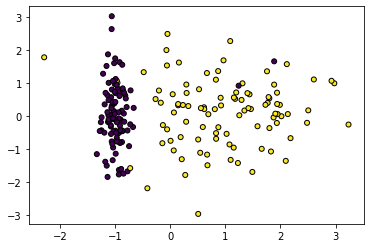

In [4]:
X1, y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, n_samples=200)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=y1,
            s=25, edgecolor='k')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

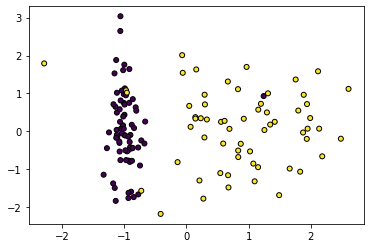

In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,
            s=25, edgecolor='k')
plt.show()

In [7]:
model = LogisticRegression(eta=0.01,epsilon=0.01)
model.fit(X_train,y_train)
model.weights

array([0.87299584, 3.30022047, 0.15131111])

In [8]:
# source: https://stackoverflow.com/questions/31292393/how-do-you-draw-a-line-using-the-weight-vector-in-a-linear-perceptron
def plot_data(inputs,targets,weights):
    # fig config
    plt.figure(figsize=(10,6))
    plt.grid(True)

    #plot input samples(2D data points) and i have two classes. 
    #one is +1 and second one is -1, so it red color for +1 and blue color for -1
    for input,target in zip(inputs,targets):
        plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

    # Here i am calculating slope and intercept with given three weights
    for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]

        #y =mx+c, m is slope and c is intercept
        y = (slope*i) + intercept
        plt.plot(i, y, 'k.')

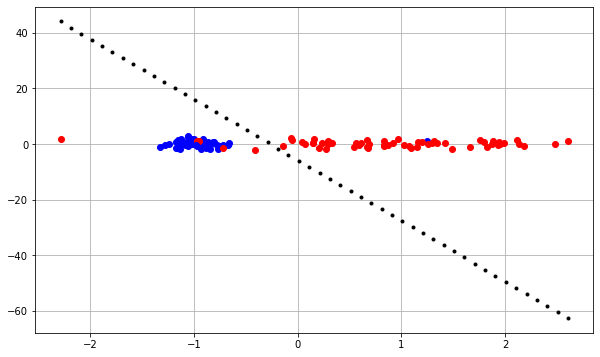

In [9]:
plot_data(X_train,y_train,model.weights)

Better way, from https://stackoverflow.com/questions/31292393/how-do-you-draw-a-line-using-the-weight-vector-in-a-linear-perceptron.

```
Plug your weights into the general form (w0 + w1x + w2y = 0) and solve for x, x=0, y, y=0:

x = -(w0 - w2y)/w1  
x = 0 when y = -w0/w2  
y = -(w0 - w1x)/w2  
y = 0 when x = -w0/w1  
Now we have two points that lie on the line: (0, -w0/w2) and (-w0/w1, 0)

slope = -(w0/w2)/(w0/w1)  
intercept = -w0/w2
```

In [10]:
# test accuracy
y_pred_proba = model.predict_proba(X_test)
print(log_loss(y_test,y_pred_proba))
y_pred = model.predict(X_test)
score = recall_score(y_test, y_pred, average='weighted')
print(score)

0.2647247422902243
0.9545454545454546


### 3.4. MAP estimation  for Logistic Regression (two class) with Gradient Descent
Regularization term helps reduce overfitting, especially when training data is sparse.

$$l(W)=?$$

$$w_i \leftarrow w_i -\eta\lambda w_i + \eta \sum_l X^l_i\left(Y^l-\hat{P}(Y^l=1|X^l,W)\right) $$

where
- $\lambda$ is a regularization term, $\lambda=\frac{1}{2\sigma^2}$

### 3.5. Model Definition (multiclass)
Logistic Regression for more than two classes. Learn $R-1$ set of weights.

For $k<R$:

$$P(Y=y_k|X=\{X_1,\ldots, X_n\})=\frac{\exp{(w_{k,0} + \sum_{i=1}^n w_{k,i}X_i)}}{1+\sum_{j=1}^{R-1}\exp{(w_{j,0} + \sum_{i=1}^n w_{ji}X_i)}}$$

where
- $R$: number of classes

***

For $k=R$:

$$P(Y=y_R|X=\{X_1,\ldots, X_n\})=\frac{1}{1+\sum_{j=1}^{R-1}\exp{(w_{j,0} + \sum_{i=1}^n w_{ji}X_i)}}$$

# one vs all approach
One-vs-all is a strategy that involves training N distinct binary classifiers, each designed to recognize a specific class. After that we collectively use those N classifiers to predict the correct class.

(11,)


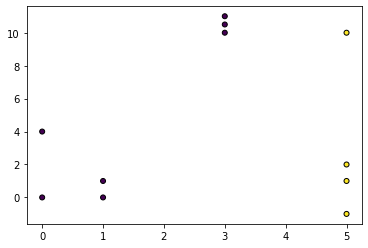

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
[-1.23667949  1.13847615 -0.40537524]
[0. 1. 0. 0.]


array([0.16218567, 0.98852112, 0.12170876, 0.03684283])

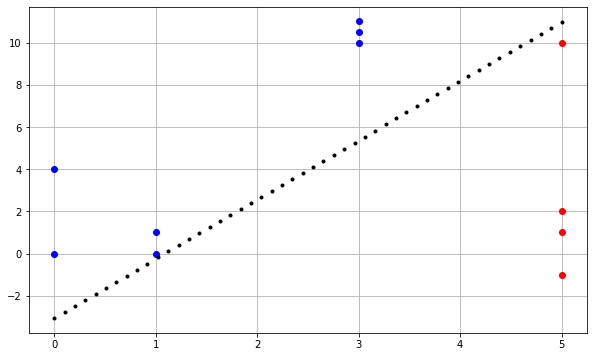

In [11]:
X_train = np.array([[1, 1],
                  [0, 0],
                  [1, 0],
                  [0, 4],
                  [5, 1],
                  [5, 2],
                  [5, -1],
                  [5, 10],
                  [3, 10],
                  [3, 10.5],
                  [3, 11]])
y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1,0,0,0])
print(y_train.shape)

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,
            s=25, edgecolor='k')
plt.show()

model = LogisticRegression(eta=0.01,epsilon=0.01)
model.fit(X_train,y_train)
print(model.weights)

plot_data(X_train,y_train,model.weights)


X_test = np.array([[0, 1],
                   [5, 0],
                   [3, 10.25],
                   [0, 5]])
print(model.predict(X_test))
model.predict_proba(X_test)[:,1]

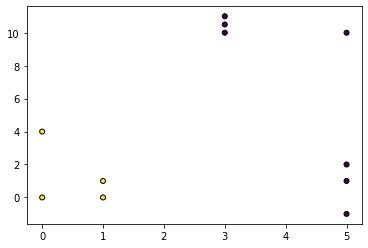

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
[ 1.34665043 -0.88978117 -0.15115761]
[1. 0. 0. 1.]


array([0.76772201, 0.04301432, 0.05355222, 0.64356299])

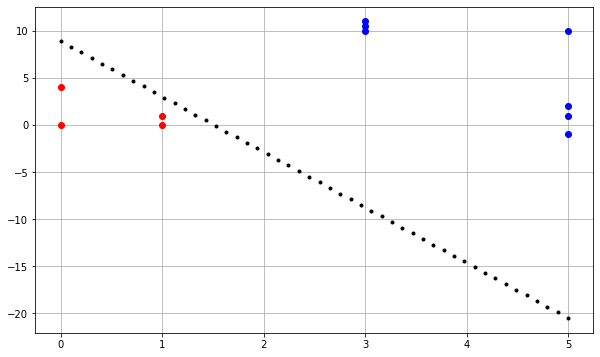

In [12]:
X_train = np.array([[1, 1],
                  [0, 0],
                  [1, 0],
                     [0,4],
                  [5, 1],
                  [5, 2],
                  [5, -1],
                    [5,10],
                  [3, 10],
                  [3, 10.5],
                  [3, 11]])


y_train = np.array([1,1,1,1,0,0,0,0,0,0,0])

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,
            s=25, edgecolor='k')
plt.show()

model = LogisticRegression(eta=0.01,epsilon=0.01)
model.fit(X_train,y_train)
print(model.weights)

plot_data(X_train,y_train,model.weights)

X_test = np.array([[0, 1],
                   [5, 0],
                   [3, 10.25],
                   [0, 5]])

print(model.predict(X_test))
model.predict_proba(X_test)[:,1]

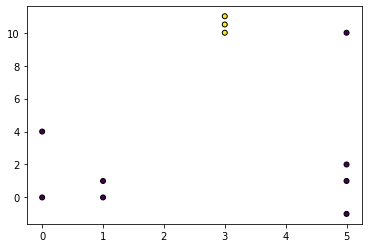

[-1.14887306 -0.88885461  0.49175771]
[0. 0. 1. 1.]


array([0.3413879 , 0.00370948, 0.77295623, 0.78749901])

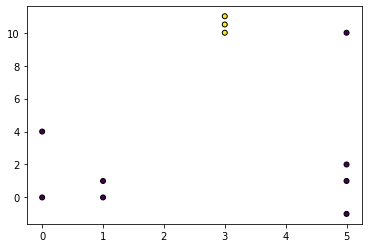

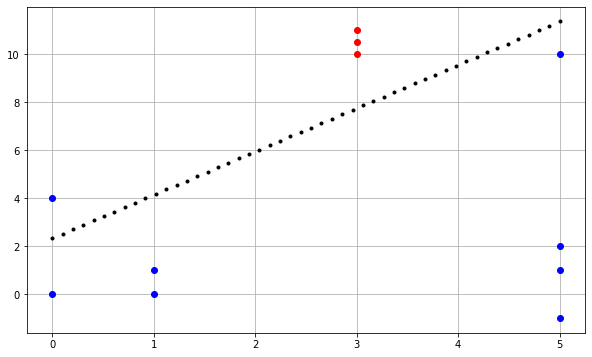

In [13]:
X_train = np.array([[1, 1],
                  [0, 0],
                  [1, 0],
                     [0,4],
                  [5, 1],
                  [5, 2],
                  [5, -1],
                    [5,10],
                  [3, 10],
                  [3, 10.5],
                  [3, 11]])

y_train = np.array([0,0,0,0,0,0,0,0,1,1,1])

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,
            s=25, edgecolor='k')
plt.show()

model = LogisticRegression(eta=0.01,epsilon=0.01)
model.fit(X_train,y_train)
print(model.weights)

X_train = np.array([[1, 1],
                  [0, 0],
                  [1, 0],
                     [0,4],
                  [5, 1],
                  [5, 2],
                  [5, -1],
                    [5,10],
                  [3, 10],
                  [3, 10.5],
                  [3, 11]])

y_train = np.array([0,0,0,0,0,0,0,0,1,1,1])

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train,
            s=25, edgecolor='k')
plot_data(X_train,y_train,model.weights)

X_test = np.array([[0, 1],
                   [5, 0],
                   [3, 10.25],
                   [0, 5]])

print(model.predict(X_test))
model.predict_proba(X_test)[:,1]

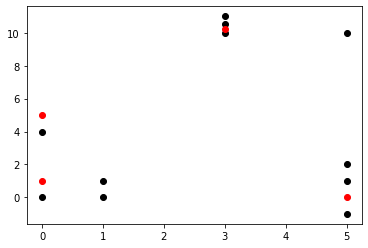

In [14]:
X_train = np.array([[1, 1],
                  [0, 0],
                  [1, 0],
                     [0,4],
                  [5, 1],
                  [5, 2],
                  [5, -1],
                    [5,10],
                  [3, 10],
                  [3, 10.5],
                  [3, 11]])

plt.scatter(X_train[:, 0], X_train[:, 1], color='k')


X_test = np.array([[0, 1],
                   [5, 0],
                   [3, 10.25],
                   [0, 5]])

plt.scatter(X_test[:, 0], X_test[:, 1],color='r')

plt.show()


STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
n_classifiers 3
training classifier 0
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
training classifier 1
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
training classifier 2
[[0.57622152 0.20450762 0.21927086]
 [0.01175415 0.97649726 0.01174859]
 [0.17183417 0.17499243 0.6531734 ]
 [0.29439326 0.21449053 0.49111621]]
[0 1 2 2]

[[0.60388947 0.12757511 0.26853543]
 [0.04154989 0.95486691 0.00358319]
 [0.05647674 0.12835536 0.8151679 ]
 [0.43842283 0.02509892 0.53647825]]
[0 1 2 2]


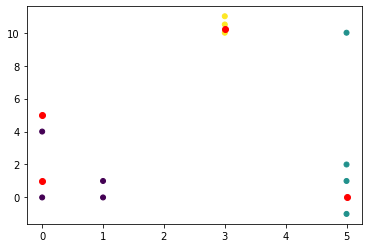

In [20]:
X = np.array([[1, 1],
              [0, 0],
              [1, 0],
              [0, 4],
              [5, 1],
              [5, 2],
              [5, -1],
              [5, 10],
              [3, 10],
              [3, 10.5],
              [3, 11]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2])

model = MulticlassLogisticRegression(eta=0.01, epsilon=0.01)
model2 = MulticlassLogisticRegression2(eta=0.01, epsilon=0.01)

model.fit(X,y)
model2.fit(X,y)

X_test = np.array([[0, 1],
                   [5, 0],
                   [3, 10.25],
                   [0, 5]])

print(model.predict_proba(X_test))
print(model.predict(X_test))
print()
print(model2.predict_proba(X_test))
print(model2.predict(X_test))


plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,s=25)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c='r')
plt.show()

n_classifiers 3
training classifier 0
training classifier 1
training classifier 2
[[0.36975254 0.28177666 0.3484708 ]
 [0.1353948  0.78253391 0.0820713 ]
 [0.09425528 0.20846642 0.6972783 ]
 [0.30278986 0.15488055 0.54232959]]
[0 1 2 2]


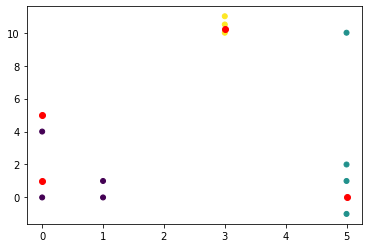

In [19]:
X = np.array([[1, 1],
              [0, 0],
              [1, 0],
              [0, 4],
              [5, 1],
              [5, 2],
              [5, -1],
              [5, 10],
              [3, 10],
              [3, 10.5],
              [3, 11]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2])


model2 = MulticlassLogisticRegression2(eta=0.01, 
                                       epsilon=0.01, 
                                       penalty='l2', 
                                       l2_lambda=5)
model2.fit(X,y)

X_test = np.array([[0, 1],
                   [5, 0],
                   [3, 10.25],
                   [0, 5]])

print(model2.predict_proba(X_test))
print(model2.predict(X_test))


plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,s=25)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c='r')
plt.show()

(100, 0.1, 'l2', 5, 100)
(100, 0.1, 'l2', 10, 100)
(100, 1, 'l2', 5, 100)
(100, 1, 'l2', 10, 100)
(200, 0.1, 'l2', 5, 100)
(200, 0.1, 'l2', 10, 100)
(200, 1, 'l2', 5, 100)
(200, 1, 'l2', 10, 100)
